In [18]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.4.3


In [19]:
inet_model = inc_net.InceptionV3()

In [39]:

def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

('n02133161', 'American_black_bear', 0.63715994)
('n02105056', 'groenendael', 0.031818025)
('n02104365', 'schipperke', 0.02994429)
('n01883070', 'wombat', 0.028509498)
('n01877812', 'wallaby', 0.025093528)


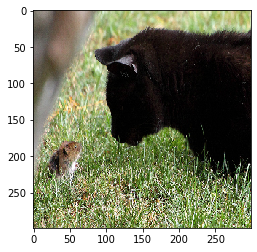

In [41]:
images1 = transform_img_fn([os.path.join('data','cat_mouse.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images1[0] / 2 + 0.5)
preds = inet_model.predict(images1)
for x in decode_predictions(preds)[0]:
    print(x)

('n02107683', 'Bernese_mountain_dog', 0.6273264)
('n02108000', 'EntleBucher', 0.07576562)
('n02107908', 'Appenzeller', 0.04866334)
('n02123045', 'tabby', 0.00867474)
('n02107574', 'Greater_Swiss_Mountain_dog', 0.006082344)


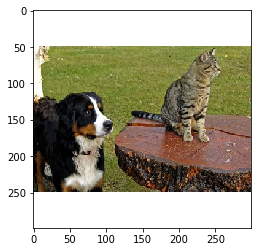

In [42]:
images2 = transform_img_fn([os.path.join('data','dogs.png')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images2[0] / 2 + 0.5)
preds = inet_model.predict(images2)
for x in decode_predictions(preds)[0]:
    print(x)

In [7]:
import lime
from lime import lime_image

In [8]:
explainer = lime_image.LimeImageExplainer()

In [20]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation1 = explainer.explain_instance(images1[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)



CPU times: user 5min 14s, sys: 45.2 s, total: 5min 59s
Wall time: 49.3 s


In [21]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation2 = explainer.explain_instance(images2[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)



CPU times: user 5min 14s, sys: 45.7 s, total: 6min
Wall time: 49 s


In [22]:
from skimage.segmentation import mark_boundaries

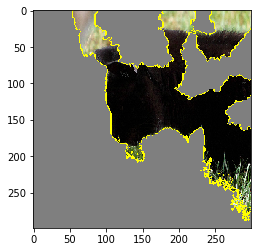

In [33]:
temp1, mask1 = explanation1.get_image_and_mask(explanation1.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp1 / 2 + 0.5, mask1))

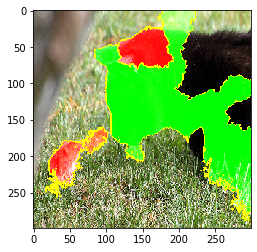

In [28]:
temp1, mask1 = explanation1.get_image_and_mask(explanation1.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp1 / 2 + 0.5, mask1))

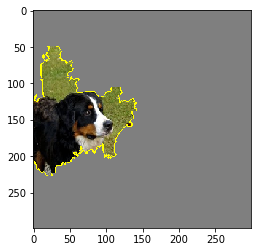

In [32]:
temp2, mask2 = explanation2.get_image_and_mask(explanation2.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp2 / 2 + 0.5, mask2))

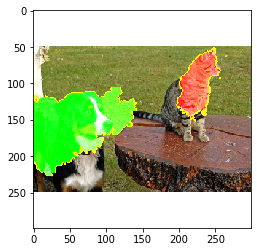

In [29]:
temp2, mask2 = explanation2.get_image_and_mask(explanation2.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp2 / 2 + 0.5, mask2))

In [34]:
explanation1.top_labels

[295, 224, 223, 106, 104]

In [36]:
explanation2.top_labels

[239, 241, 240, 281, 238]